In [3]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
import pandas as pd

In [4]:
path='/home/aachar5/'
file='qbo.data'
index_name='qbo'
df=pd.read_table(path+file,skiprows=1,
                 header=None,delim_whitespace=True,
                 index_col=0,parse_dates=True,
                 na_values=['-99.9','-99.90'])
df.drop(df.tail(6).index,inplace=True)

In [5]:
df

,1,2,3,4,5,6,7,8,9,10,11,12
0,,,,,,,,,,,,
1948,-4.44,-5.78,-7.31,-6.70,-5.57,-4.73,-5.51,-7.22,-7.24,-6.07,-6.28,-8.18
1949,-9.77,-11.80,-11.72,-10.69,-9.34,-9.43,-9.07,-9.08,-8.32,-7.01,-6.43,-7.24
1950,-8.99,-11.37,-10.63,-8.19,-6.09,-6.61,-7.11,-6.51,-3.82,-2.39,-2.18,-3.31
1951,-6.01,-5.32,-1.93,0.91,2.26,-0.30,-2.70,-5.31,-5.92,-4.59,-3.65,-3.98
1952,-6.80,-7.71,-6.99,-5.68,-4.76,-6.00,-7.60,-8.15,-5.73,-2.96,-0.51,-1.65
...,...,...,...,...,...,...,...,...,...,...,...,...
2018,-19.02,-19.37,-19.77,-21.41,-24.23,-28.45,-29.10,-20.41,-9.91,-2.79,3.36,8.05
2019,9.02,9.25,11.82,13.36,14.59,14.36,10.96,9.97,8.25,7.27,5.07,1.66
2020,-2.51,-3.20,-4.36,-5.03,-4.86,-2.78,0.34,4.78,7.95,10.80,11.15,10.37


In [6]:
start_date=str(df.index[0])+'-'+str(df.columns[0])+'-01'
end_date=str(df.index[-1])+'-'+str(df.columns[11])+'-01'
print(start_date)
print(end_date)

1948-1-01
2022-12-01


In [7]:
dates=pd.date_range(start=start_date,end=end_date,freq='MS')
dates

DatetimeIndex(['1948-01-01', '1948-02-01', '1948-03-01', '1948-04-01',
               '1948-05-01', '1948-06-01', '1948-07-01', '1948-08-01',
               '1948-09-01', '1948-10-01',
               ...
               '2022-03-01', '2022-04-01', '2022-05-01', '2022-06-01',
               '2022-07-01', '2022-08-01', '2022-09-01', '2022-10-01',
               '2022-11-01', '2022-12-01'],
              dtype='datetime64[ns]', length=900, freq='MS')

In [8]:
dates.shape

(900,)

In [9]:
clim_index=df.T.unstack().values
clim_index=clim_index.astype('float32')

In [10]:
ds_index=xr.DataArray(clim_index,
                      coords={'time':dates},
                              dims=['time'])        
ds_index=ds_index.to_dataset(name='qbo')
ds_index

<xarray.Dataset>
Dimensions:  (time: 900)
Coordinates:
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2022-12-01
Data variables:
    qbo      (time) float32 -4.44 -5.78 -7.31 -6.7 ... 9.8 -999.0 -999.0 -999.0

In [11]:
da_index = ds_index.sel(time=slice('2001-01-01','2021-12-01'))
da_index

<xarray.Dataset>
Dimensions:  (time: 252)
Coordinates:
  * time     (time) datetime64[ns] 2001-01-01 2001-02-01 ... 2021-12-01
Data variables:
    qbo      (time) float32 -15.69 -15.53 -15.99 -17.73 ... -19.14 -19.78 -21.58

In [12]:
path = '/scratch/aachar5/clim680_dataset/'
fname = 'adaptor.mars.internal-1663965452.3528512-14052-2-b47b40ba-074e-4000-baa7-e70764531a59.nc'
ds_temp = xr.open_dataset(path+fname)
ds_temp

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, time: 264)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 2000-01-01 2000-02-01 ... 2021-12-01
Data variables:
    t          (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-09-23 20:37:36 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [13]:
da_climo = ds_temp.groupby('time.month').mean()
da_anoms = ds_temp.groupby('time.month')-da_climo
da_anoms

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, time: 264)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 2000-01-01 2000-02-01 ... 2021-12-01
    month      (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    t          (time, latitude, longitude) float32 -0.947 -0.947 ... 1.907 1.907

Defining Easterly, westerly and neutral for QBO

In [22]:
Westerly = da_index['qbo'].where(da_index['qbo']>=1) 
Easterly = da_index['qbo'].where(da_index['qbo']<=-1)
Neutral = da_index['qbo'].where((da_index['qbo']>-1) & (da_index['qbo']<1))

Selecting the dates that match with Easterly, Westerly and neutral QBO

In [24]:
Westerly_temp = da_anoms.sel(time=Westerly.dropna(dim='time')['time']).mean(dim='time')
Easterly_temp = da_anoms.sel(time=Easterly.dropna(dim='time')['time']).mean(dim='time')
Neutral_temp = da_anoms.sel(time=Neutral.dropna(dim='time')['time']).mean(dim='time')

comp_temp = [Westerly_temp,Easterly_temp,Neutral_temp]
comp_temp

[<xarray.Dataset>
 Dimensions:    (longitude: 1440, latitude: 721)
 Coordinates:
   * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
   * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
 Data variables:
     t          (latitude, longitude) float32 0.06042 0.06042 ... 0.06767 0.06767,
 <xarray.Dataset>
 Dimensions:    (longitude: 1440, latitude: 721)
 Coordinates:
   * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
   * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
 Data variables:
     t          (latitude, longitude) float32 -0.004797 -0.004797 ... -0.02387,
 <xarray.Dataset>
 Dimensions:    (longitude: 1440, latitude: 721)
 Coordinates:
   * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
   * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
 Data variables:
     t          (latitude, longitude) float32 0.3557 0.3557 ... 0.

How many months do we have Westerly, Easterly and Neutral

In [26]:
print('QBO_westerly: ',Westerly.count(dim='time').values)
print('QBO_easterly: ',Easterly.count(dim='time').values)
print('noQBO: ',Neutral.count(dim='time').values)

counts=[Westerly.count(dim='time').values,
        Easterly.count(dim='time').values,
        Neutral.count(dim='time').values]
print(counts)

QBO_westerly:  121
QBO_easterly:  121
noQBO:  10
[array(121), array(121), array(10)]


AttributeError: 'Dataset' object has no attribute 'shape'

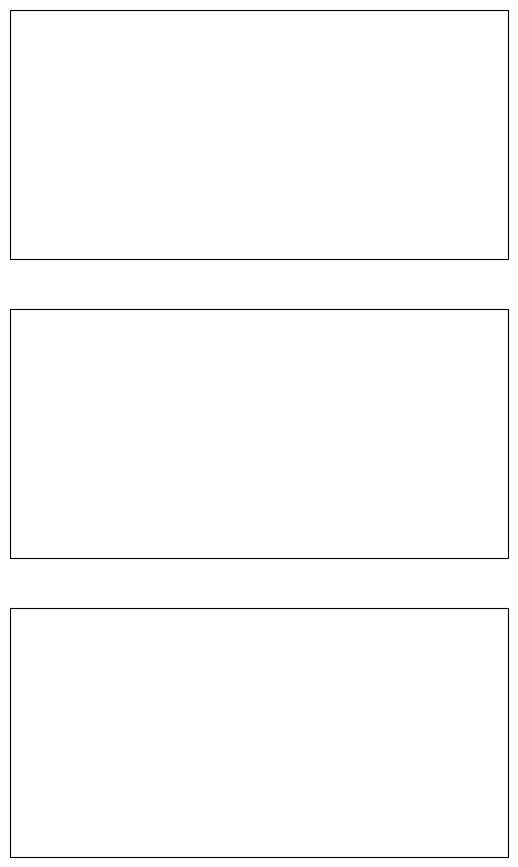

In [37]:
labels=['QBO_Westerly','QBO_Easterly', 'Neutral']
clevs = np.arange(-2.0,2.1,0.25)

# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=3,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(8.5,11))

# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array (just 3 rows)
axs = axs.flatten()

#Loop over all of the seasons and plot
for i,qbo in enumerate(comp_temp):

        # Select the season
        data = comp_temp[i]

        # Add the cyclic point
        data,lons = add_cyclic_point(data,coord=comp_temp[i]['longitude'])

        # Contour plot
        cs=axs[i].contourf(lons,comp_temp[i]['latitude'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='BrBG',extend='both')

       # Longitude labels
        axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
        axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        
        # Title each subplot with the name of the season
        axs[i].set_title(labels[i]+' ('+str(counts[i])+')')

        # Draw the coastines for each subplot
        axs[i].coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.25, 0.18, 0.5, 0.012])

# Draw the colorbar
cbar = fig.colorbar(cs,cax=cbar_ax,orientation='horizontal',label='mm/day')

# Add a big title at the top
plt.suptitle('Global Temperature Anomalies due to QBO') ;